## importing data

In [1]:
import scipy.io as sio
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pprint

Pretty printing has been turned OFF


In [3]:
start_dir = "../../"+os.path.relpath(os.path.expanduser("~"))+"/Volumes/project/Hanson"

In [4]:
floc = "/External_MRI_Projects/NKI_Rockland/Neuroimaging/BIDS/derivatives/DWI_mrtrix_preprocessed"

In [5]:
[ x for x in os.listdir(start_dir+floc) if x.endswith("mat") ]

['Fingerprint_test_connectometry.qa.db.fib.gz.vec0.mat', 'FingerPrintTest.N677.connectometry.qa.db.fib.gz.vec0.mat', 'FingerPrintTest.N677.connectometry.qa.db.fib.gz.vec1.mat']

In [6]:
test_fn = '/Fingerprint_test_connectometry.qa.db.fib.gz.vec0.mat'
real_fn1 = '/FingerPrintTest.N677.connectometry.qa.db.fib.gz.vec0.mat'
real_fn2 = '/FingerPrintTest.N677.connectometry.qa.db.fib.gz.vec1.mat'

In [7]:
matfile1 = sio.loadmat(start_dir+floc+real_fn1)
matfile2 = sio.loadmat(start_dir+floc+real_fn2)

In [9]:
# joblib is the same as pickle but more efficient for stuff w numpy arrays
from joblib import dump, load

In [13]:
dump(matfile1, '../files/mat1.joblib.gz',compress=9) 
dump(matfile2, '../files/mat2.joblib.gz',compress=9) 

['../files/mat2.joblib.gz']

In [12]:
matfile1 = load('../files/mat1.joblib') 
matfile2 = load('../files/mat2.joblib') 

In [13]:
matfile1.keys()

dict_keys(['subject_names', 'subject0', 'subject1', 'subject2', 'subject3', 'subject4', 'subject5', 'subject6', 'subject7', 'subject8', 'subject9', 'subject10', 'subject11', 'subject12', 'subject13', 'subject14', 'subject15', 'subject16', 'subject17', 'subject18', 'subject19', 'subject20', 'subject21', 'subject22', 'subject23', 'subject24', 'subject25', 'subject26', 'subject27', 'subject28', 'subject29', 'subject30', 'subject31', 'subject32', 'subject33', 'subject34', 'subject35', 'subject36', 'subject37', 'subject38', 'subject39', 'subject40', 'subject41', 'subject42', 'subject43', 'subject44', 'subject45', 'subject46', 'subject47', 'subject48', 'subject49', 'subject50', 'subject51', 'subject52', 'subject53', 'subject54', 'subject55', 'subject56', 'subject57', 'subject58', 'subject59', 'subject60', 'subject61', 'subject62', 'subject63', 'subject64', 'subject65', 'subject66', 'subject67', 'subject68', 'subject69', 'subject70', 'subject71', 'subject72', 'subject73', 'subject74', 'subjec

In [14]:
# why is this a nested array???
matfile1["subject_names"][0]

array([115, 117,  98, ..., 102,  10,   0], dtype=uint8)

In [20]:
# phenotypic data
pheno_df = pd.read_csv("../files/NKI_IRI_DWI_combined.csv")

In [21]:
pheno_df.head()

,Identifiers_alt,age,sex,ipri_29,ipri_30,ipri_31,ipri_32
0,sub-A00023510_ses-BAS1,23,0,17,21,19,17
1,sub-A00027439_ses-BAS1,15,0,17,11,14,8
2,sub-A00027443_ses-BAS1,15,0,11,9,16,5
3,sub-A00027544_ses-BAS1,22,0,22,19,24,16
4,sub-A00028150_ses-BAS1,44,1,12,18,19,17


In [22]:
pheno_df.describe()

,age,sex,ipri_29,ipri_30,ipri_31,ipri_32
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
mean,32.324963,0.604136,15.877400,14.422452,20.404727,11.707533
std,13.110167,0.489397,4.216554,6.009014,5.072420,5.204699
min,13.000000,0.000000,3.000000,0.000000,0.000000,1.000000
25%,21.000000,0.000000,13.000000,10.000000,17.000000,8.000000
50%,30.000000,1.000000,16.000000,15.000000,21.000000,12.000000
75%,45.000000,1.000000,19.000000,19.000000,24.000000,15.000000
max,54.000000,1.000000,24.000000,28.000000,28.000000,31.000000


## prepping the data

In [23]:
# just the subjects
subj1 = [x for x in list(matfile1.keys()) if "sub" in x and "_" not in x]
subj2 = [x for x in list(matfile2.keys()) if "sub" in x and "_" not in x]

In [24]:
len(subj1)

400

In [25]:
len(subj2)

277

In [26]:
X = []
for sub in subj1:
    X.append(matfile1[sub][0])
for sub in subj2:
    X.append(matfile2[sub][0])

In [27]:
X = np.array(X)
X

array([[0.13154687, 0.14433745, 0.1312975 , ..., 0.03943831, 0.02088308,
        0.05409636],
       [0.8178366 , 0.74562216, 0.72506034, ..., 0.34529442, 0.41764247,
        0.56341   ],
       [0.50131667, 0.47282678, 0.5085435 , ..., 0.1921919 , 0.2769494 ,
        0.2239489 ],
       ...,
       [2.193593  , 1.8504024 , 2.1619565 , ..., 0.5081969 , 0.4759148 ,
        0.6066462 ],
       [0.2378414 , 0.17248623, 0.23666348, ..., 0.8264794 , 0.7652172 ,
        0.7216453 ],
       [0.32788658, 0.35372517, 0.36588156, ..., 0.14133348, 0.10620189,
        0.06241945]], dtype=float32)

In [28]:
y = np.array(pheno_df.age)

In [29]:
# already saved
dump(X, '../files/fingerprintX.joblib.gz',compress=9) 
dump(y, '../files/fingerprintY.joblib.gz',compress=9) 

['../files/fingerprintY.joblib.gz']

## fitting the model(s)

In [30]:
from sklearn.svm import SVC 
# from sklearn.naive_bayes import GaussianNB 
# naive bayes got like 9% so :(

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [33]:
X_small = X[:60]
y_small = y[:60]
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, 
                                                                            y_small, 
                                                                            test_size = 1/3, 
                                                                            random_state = 0)

In [38]:
model = SVC(kernel='linear', C=1E5, verbose=1) 
model.fit(X_train_small, y_train_small)

[LibSVM]*
optimization finished, #iter = 1
obj = -0.000010, rho = -0.555537
nSV = 2, nBSV = 0
..*.*
optimization finished, #iter = 11
obj = -0.000013, rho = 1.146766
nSV = 3, nBSV = 0
*
optimization finished, #iter = 1
obj = -0.000010, rho = 0.301333
nSV = 2, nBSV = 0
..*.*
optimization finished, #iter = 10
obj = -0.000013, rho = 0.806577
nSV = 3, nBSV = 0
.*.*
optimization finished, #iter = 14
obj = -0.000018, rho = 0.853776
nSV = 7, nBSV = 0
*
optimization finished, #iter = 1
obj = -0.000010, rho = 0.271628
nSV = 2, nBSV = 0
..*..*
optimization finished, #iter = 12
obj = -0.000015, rho = 1.282669
nSV = 3, nBSV = 0
..*.*
optimization finished, #iter = 10
obj = -0.000014, rho = 1.275291
nSV = 3, nBSV = 0
*
optimization finished, #iter = 1
obj = -0.000010, rho = -0.143824
nSV = 2, nBSV = 0
*
optimization finished, #iter = 1
obj = -0.000011, rho = 0.007381
nSV = 2, nBSV = 0
..*.*
optimization finished, #iter = 11
obj = -0.000015, rho = 0.231633
nSV = 3, nBSV = 0
*
optimization finished, 

SVC(C=100000.0, kernel='linear', verbose=1)

.*.*
optimization finished, #iter = 8
obj = -0.000013, rho = 0.184706
nSV = 4, nBSV = 0
Total nSV = 40


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(model, X_small, y_small, cv=5)

/Users/eva/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [37]:
scores

array([0.25      , 0.        , 0.08333333, 0.08333333, 0.08333333])

In [28]:
labels = model.predict(X_test)
labels

array([13, 16, 22, 45, 13, 16, 13, 22, 22, 22, 16, 13, 27, 22, 13, 21, 22,
       13, 13, 21, 22, 21, 21, 13, 13, 20, 13, 16, 22, 13, 21, 13, 22, 13,
       13, 13, 21, 13, 13, 13, 13, 21, 13, 16, 13, 22, 13, 13, 22, 13, 13,
       16, 21, 13, 22, 21, 13, 21, 22, 20, 13, 13, 13, 22, 46, 22, 22, 21,
       13, 22, 22, 13, 21, 45, 22, 22, 22, 21, 16, 13, 13, 20, 13, 13, 13,
       13, 16, 13, 16, 22, 16, 16, 13, 21, 13, 13, 13, 22, 16, 16, 20, 13,
       20, 22, 22, 21, 16, 22, 45, 13, 13, 22, 13, 13, 13, 22, 13, 22, 22,
       21, 21, 16, 20, 20, 21, 16, 20, 13, 16, 13, 22, 13, 13, 21, 21, 13,
       13, 20, 13, 22, 16, 21, 21, 13, 13, 13, 16, 13, 13, 13, 16, 20, 22,
       22, 13, 20, 13, 13, 13, 20, 20, 13, 16, 20, 21, 45, 13, 20, 13, 13,
       13, 13, 13, 13, 22, 13, 20, 21, 20, 13, 13, 13, 13, 22, 13, 13, 22,
       45, 21, 13, 16, 16, 13, 13, 13, 13, 20, 22, 21, 13, 21, 13, 22, 16,
       13, 20, 13, 22, 13, 20, 22, 13, 22, 21, 21, 35, 13, 22, 16, 21, 16,
       13, 13, 22, 13, 20

In [29]:
y_test

array([21, 37, 53, 37, 15, 14, 50, 14, 43, 42, 22, 45, 34, 39, 28, 34, 52,
       23, 51, 23, 23, 23, 49, 52, 46, 49, 14, 36, 49, 13, 39, 42, 22, 22,
       13, 53, 42, 17, 23, 22, 46, 27, 42, 27, 44, 46, 13, 52, 45, 19, 53,
       27, 26, 13, 48, 39, 45, 15, 52, 24, 48, 41, 21, 42, 50, 28, 13, 20,
       21, 30, 29, 26, 21, 51, 54, 40, 27, 21, 42, 37, 27, 48, 36, 17, 27,
       17, 19, 50, 22, 51, 23, 38, 23, 18, 53, 54, 49, 46, 27, 14, 42, 15,
       35, 32, 18, 33, 33, 53, 51, 22, 26, 43, 46, 42, 49, 40, 21, 21, 47,
       27, 47, 28, 21, 21, 19, 21, 16, 15, 31, 39, 19, 44, 14, 22, 47, 42,
       29, 38, 14, 21, 13, 47, 13, 44, 21, 21, 24, 48, 21, 53, 20, 38, 40,
       16, 43, 27, 42, 33, 20, 48, 23, 36, 21, 29, 21, 49, 16, 21, 13, 42,
       49, 32, 52, 50, 20, 50, 51, 24, 38, 44, 15, 45, 22, 15, 25, 49, 28,
       49, 48, 16, 30, 18, 15, 44, 54, 23, 31, 52, 49, 25, 24, 14, 34, 25,
       44, 28, 26, 50, 43, 31, 16, 13, 54, 20, 52, 33, 15, 32, 26, 44, 18,
       40, 44, 25, 17, 28

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)

In [31]:
mat

array([[6, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

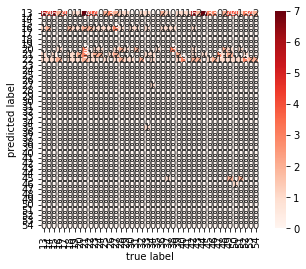

In [32]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Reds", 
            xticklabels=set(y), yticklabels=set(y))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.04424778761061947